In [215]:
import tensorflow as tf
import keras

In [216]:
file_path = "https://www.kaggle.com/datasets/parve05/customer-review-dataset"

data_dir = keras.utils.get_file("customer_data" , origin=file_path , untar=True)

In [217]:
len(data_dir)

35

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [219]:
pd.read_csv('EW-MAX.csv')

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600
...,...,...,...,...,...,...,...
4387,2017/9/1,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,2017/9/5,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,2017/9/6,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,2017/9/7,112.459999,112.900002,112.000000,112.339996,112.339996,1251600


In [220]:
df = pd.read_csv('EW-MAX.csv')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 240.3+ KB


In [222]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [223]:
df.duplicated().sum()

0

In [224]:
a = df[['Open' , 'High' , 'Low']]


In [225]:
sorted_df = df.sort_values('Volume' , ascending=True).head(10)
sorted_df

,Date,Open,High,Low,Close,Adj_Close,Volume
1425,2005/11/25,10.275000,10.352500,10.260000,10.325000,10.325000,190400
104,2000/8/23,5.718750,5.734375,5.640625,5.718750,5.718750,220000
93,2000/8/8,5.671875,5.687500,5.500000,5.625000,5.625000,224000
923,2003/11/28,7.500000,7.582500,7.477500,7.530000,7.530000,224800
1926,2007/11/23,12.282500,12.462500,12.257500,12.422500,12.422500,225600
320,2001/7/3,6.587500,6.637500,6.562500,6.562500,6.562500,226000
322,2001/7/6,6.535000,6.535000,6.370000,6.370000,6.370000,246400
150,2000/10/27,5.828125,5.875000,5.750000,5.750000,5.750000,262000
942,2003/12/26,7.450000,7.500000,7.425000,7.472500,7.472500,263600
116,2000/9/11,5.593750,5.593750,5.531250,5.578125,5.578125,264400


In [226]:
sorted_df = df.sort_values('High' , ascending=True).head(10)
sorted_df

,Date,Open,High,Low,Close,Adj_Close,Volume
153,2000/11/1,3.375000,3.390625,3.000000,3.250000,3.250000,19073200
154,2000/11/2,3.296875,3.562500,3.265625,3.546875,3.546875,3819600
7,2000/4/5,3.468750,3.562500,3.453125,3.484375,3.484375,6349600
166,2000/11/20,3.578125,3.578125,3.390625,3.437500,3.437500,530800
6,2000/4/4,3.531250,3.578125,3.093750,3.500000,3.500000,13136800
8,2000/4/6,3.500000,3.593750,3.468750,3.578125,3.578125,7181200
165,2000/11/17,3.609375,3.609375,3.390625,3.546875,3.546875,1190000
15,2000/4/17,3.578125,3.609375,3.515625,3.562500,3.562500,2992000
16,2000/4/18,3.609375,3.625000,3.484375,3.515625,3.515625,2896000
14,2000/4/14,3.609375,3.625000,3.531250,3.609375,3.609375,2626000


In [227]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,4392.0,3.056254e+01,2.991476e+01,3.296875,8.718125e+00,1.476625e+01,4.254625e+01,1.210800e+02
High,4392.0,3.089362e+01,3.021097e+01,3.390625,8.803125e+00,1.498125e+01,4.305125e+01,1.217500e+02
Low,4392.0,3.023883e+01,2.961576e+01,3.000000,8.625000e+00,1.466250e+01,4.208625e+01,1.201700e+02
Close,4392.0,3.057258e+01,2.990578e+01,3.250000,8.712500e+00,1.476750e+01,4.254000e+01,1.213600e+02
Adj_Close,4392.0,3.057258e+01,2.990578e+01,3.250000,8.712500e+00,1.476750e+01,4.254000e+01,1.213600e+02
Volume,4392.0,1.884027e+06,1.621609e+06,190400.000000,1.088800e+06,1.539300e+06,2.188900e+06,4.641260e+07


In [228]:
df.query("Volume > 1500000").sort_values("Volume" , ascending=False)

,Date,Open,High,Low,Close,Adj_Close,Volume
2770,2011/3/31,44.005001,44.095001,43.360001,43.500000,43.500000,46412600
2103,2008/8/7,14.082500,14.547500,13.437500,14.460000,14.460000,23767600
3288,2013/4/24,33.275002,33.299999,31.750000,32.299999,32.299999,22986800
153,2000/11/1,3.375000,3.390625,3.000000,3.250000,3.250000,19073200
152,2000/10/31,3.812500,4.000000,3.343750,3.359375,3.359375,17944400
...,...,...,...,...,...,...,...
3358,2013/8/2,36.575001,36.715000,36.189999,36.305000,36.305000,1502600
2677,2010/11/16,32.669998,32.755001,31.889999,32.169998,32.169998,1501200
2326,2009/6/26,16.860001,16.900000,16.605000,16.812500,16.812500,1501200
3524,2014/4/1,37.384998,37.494999,36.724998,37.110001,37.110001,1500400


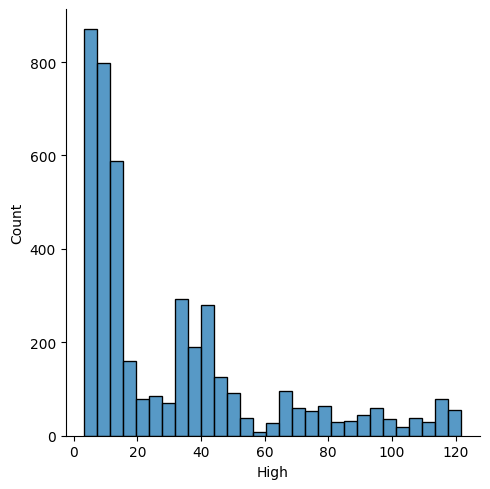

In [229]:
sns.displot(df['High'] )

<Axes: xlabel='High', ylabel='Count'>

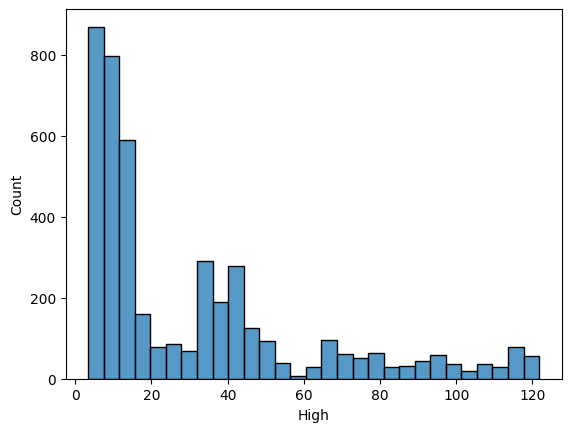

In [230]:
sns.histplot(df.High)

In [231]:
x = df.drop(['Close','Date'] , axis=1)
y = df['Close']

In [232]:
x.shape

(4392, 5)

In [233]:
y.shape

(4392,)

In [234]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import numpy as np

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [236]:
def evaluate_model(y_test,y_pred):

  mse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  r2 = r2_score(y_test,y_pred)

  return mae , rmse , r2

In [237]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'DecisionTree' : DecisionTreeRegressor()
}

In [239]:
len(models)

5

In [240]:
models.items()

dict_items([('LinearRegression', LinearRegression()), ('Lasso', Lasso()), ('Ridge', Ridge()), ('Elasticnet', ElasticNet()), ('DecisionTree', DecisionTreeRegressor())])

In [249]:
for model_name , model in models.items():
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  mae , rmse , r2 = evaluate_model(y_test,y_pred)

  print(model_name)
  print('MODEL TRAINING PERFORMANCE')
  print("RMSE:",rmse)
  print('MAE:',mae)
  print('R2:',r2*100)

  print('*'*35)
  print('🎆'*15)
  print('*'*35)
  print('\n')



LinearRegression
MODEL TRAINING PERFORMANCE
RMSE: 1.9392339717286988e-13
MAE: 1.0959172266995729e-13
R2: 100.0
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************


Lasso
MODEL TRAINING PERFORMANCE
RMSE: 0.41952596490319116
MAE: 0.22819447630224157
R2: 99.98009699589664
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************


Ridge
MODEL TRAINING PERFORMANCE
RMSE: 0.0013874018244309167
MAE: 0.0007281289515326808
R2: 99.99999978232654
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************


Elasticnet
MODEL TRAINING PERFORMANCE
RMSE: 0.35912048311024014
MAE: 0.1951457383933745
R2: 99.98541584417427
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************


DecisionTree
MODEL TRAINING PERFORMANCE
RMSE: 0.10847894897825838
MAE: 0.04093037517241379
R2: 99.99866926407856
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.867e+02, tolerance: 2.643e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.690e+02, tolerance: 2.643e+02
  model = cd_fast.enet_coordinate_descent(


In [251]:
model = DecisionTreeRegressor()

In [253]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


g_search = GridSearchCV(estimator=model , param_grid=param_grid , cv=5 , scoring='accuracy')

In [254]:
g_search.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [255]:
g_search.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [265]:
best_model = g_search.best_estimator_
best_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_features='auto')

In [266]:
y_pred = best_model.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
print("BEST MODEL MSE:",MSE)

BEST MODEL MSE: 0.009596889890269642


In [267]:
r2_score(y_test,y_pred)

0.9999891474585155

In [260]:
import pickle

In [261]:
with open('stock_predict.pkl' , 'wb') as file:
  pickle.dump(best_model , file)

In [268]:
import joblib

In [270]:
joblib.dump(best_model , "stock_model.joblib")

['stock_model.joblib']

In [271]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
